In [ ]:

import os
import shutil
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
(train_images, train_labels), (val_images, val_labels) = tf.keras.datasets.mnist.load_data()

# Split the data into training and validation sets with a 6:1 ratio
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=1/7, random_state=42)

# Summarize loaded dataset
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (val_images.shape, val_labels.shape))

# Reshape the images to (28, 28, 1) and convert the pixel values to float32 in the range [0, 1]
train_images = train_images.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
val_images = val_images.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# Convert the labels to one-hot vectors of length 10
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=10)


Train: X=(51428, 28, 28), y=(51428,)
Test: X=(8572, 28, 28), y=(8572,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding = 'same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    Dropout(0.1),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding = 'same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    Dropout(0.1),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    Dropout(0.1),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    Dropout(0.1),


    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 128 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'), 
  
    tf.keras.layers.Dense(10, activation='softmax')  
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 32)       1

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

train_generator = train_datagen.flow(
    x=train_images,
    y=train_labels,
    batch_size=64)

val_generator = val_datagen.flow(
    
    x=val_images,
    y=val_labels,
    batch_size=32)



In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
            train_generator,
            epochs=100,
            validation_data=val_generator,
            verbose=1
            )

Epoch 1/100
804/804 [==============================] - 21s 17ms/step - loss: 0.1720 - accuracy: 0.9459 - val_loss: 0.0571 - val_accuracy: 0.9825
Epoch 2/100
804/804 [==============================] - 9s 11ms/step - loss: 0.0623 - accuracy: 0.9805 - val_loss: 0.0445 - val_accuracy: 0.9866
Epoch 3/100
804/804 [==============================] - 8s 10ms/step - loss: 0.0500 - accuracy: 0.9850 - val_loss: 0.0379 - val_accuracy: 0.9897
Epoch 4/100
804/804 [==============================] - 9s 11ms/step - loss: 0.0381 - accuracy: 0.9881 - val_loss: 0.0504 - val_accuracy: 0.9874
Epoch 5/100
804/804 [==============================] - 8s 9ms/step - loss: 0.0340 - accuracy: 0.9899 - val_loss: 0.0455 - val_accuracy: 0.9886
Epoch 6/100
804/804 [==============================] - 8s 10ms/step - loss: 0.0298 - accuracy: 0.9906 - val_loss: 0.0389 - val_accuracy: 0.9910
Epoch 7/100
804/804 [==============================] - 8s 10ms/step - loss: 0.0248 - accuracy: 0.9927 - val_loss: 0.0372 - val_accuracy:

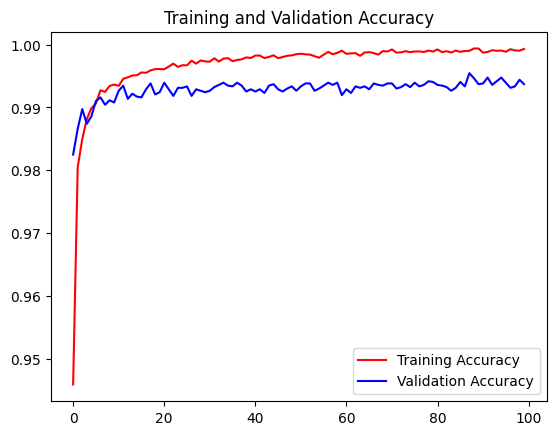

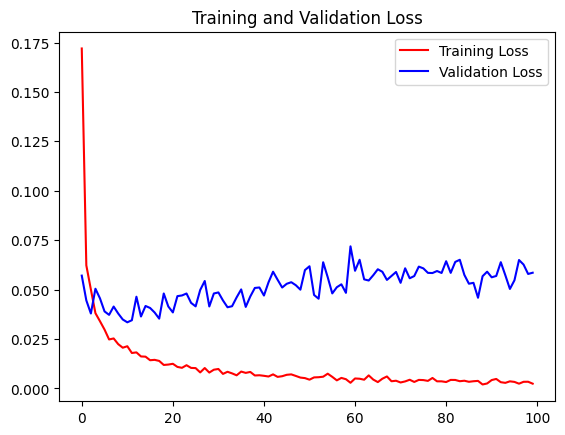

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.legend()
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')

plt.legend()
plt.show()


Let's test our CNN with a few examples.


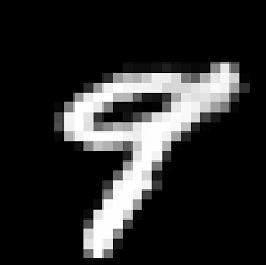

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
from PIL import Image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = Image.open(path).convert('L') # Convert to grayscale
  img = img.resize((28, 28)) # Resize to (28, 28)
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  pred_class = np.argmax(classes[0])

  if pred_class == 0:
    print(fn + " is a class 0")
  elif pred_class == 1:
    print(fn + " is a class 1")
  elif pred_class == 2:
    print(fn + " is a class 2")
  elif pred_class == 3:
    print(fn + " is a class 3")
  elif pred_class == 4:
    print(fn + " is a class 4")
  elif pred_class == 5:
    print(fn + " is a class 5")
  elif pred_class == 6:
    print(fn + " is a class 6")
  elif pred_class == 7:
    print(fn + " is a class 7")
  elif pred_class == 8:
    print(fn + " is a class 8")
  elif pred_class == 9:
    print(fn + " is a class 9")



KeyboardInterrupt: ignored

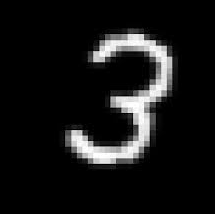

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
from PIL import Image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = Image.open(path).convert('L') # Convert to grayscale
  img = img.resize((28, 28)) # Resize to (28, 28)
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  pred_class = np.argmax(classes[0])

  if pred_class == 0:
    print(fn + " is a class 0")
  elif pred_class == 1:
    print(fn + " is a class 1")
  elif pred_class == 2:
    print(fn + " is a class 2")
  elif pred_class == 3:
    print(fn + " is a class 3")
  elif pred_class == 4:
    print(fn + " is a class 4")
  elif pred_class == 5:
    print(fn + " is a class 5")
  elif pred_class == 6:
    print(fn + " is a class 6")
  elif pred_class == 7:
    print(fn + " is a class 7")
  elif pred_class == 8:
    print(fn + " is a class 8")
  elif pred_class == 9:
    print(fn + " is a class 9")



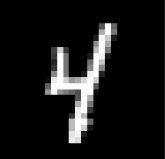

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
from PIL import Image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = Image.open(path).convert('L') # Convert to grayscale
  img = img.resize((28, 28)) # Resize to (28, 28)
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  pred_class = np.argmax(classes[0])

  if pred_class == 0:
    print(fn + " is a class 0")
  elif pred_class == 1:
    print(fn + " is a class 1")
  elif pred_class == 2:
    print(fn + " is a class 2")
  elif pred_class == 3:
    print(fn + " is a class 3")
  elif pred_class == 4:
    print(fn + " is a class 4")
  elif pred_class == 5:
    print(fn + " is a class 5")
  elif pred_class == 6:
    print(fn + " is a class 6")
  elif pred_class == 7:
    print(fn + " is a class 7")
  elif pred_class == 8:
    print(fn + " is a class 8")
  elif pred_class == 9:
    print(fn + " is a class 9")

